In [14]:
import numpy as np
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt

In [267]:
df = pd.read_csv('logreg_data.csv')
x_vals = df['x'].values
y = df['y'].values
df.head()

,x,y
0,7.9,1
1,9.0,1
2,3.0,0
3,9.3,1
4,3.7,0


In [213]:
x = df.drop(['y'], axis=1) # Eliminamos a las y
x['n'] = 1
rws = list(x.index)
cols = list(x.columns)
x = x[[cols[-1]] + cols[0:1]]
X = x.to_numpy()
x.head()

,n,x
0,1,7.9
1,1,9.0
2,1,3.0
3,1,9.3
4,1,3.7


### Statsmodels

In [84]:
import statsmodels.api as smf

In [286]:
logit_model = smf.Logit(y, X)
result = logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.165699
         Iterations 10
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.757     
Dependent Variable: y                AIC:              10.2966   
Date:               2023-07-11 01:44 BIC:              12.1854   
No. Observations:   19               Log-Likelihood:   -3.1483   
Df Model:           1                LL-Null:          -12.932   
Df Residuals:       17               LLR p-value:      9.7114e-06
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     10.0000                                      
-------------------------------------------------------------------
          Coef.     Std.Err.      z      P>|z|     [0.025    0.975]
-------------------------------------------------------------------
const    -18.6041    14.1351   -1.3162   0.1881   -46.3085   9.1003
x1         2.9726     2.1813    1.3627   0.1730    -1.302

In [287]:
betas = result.params
betas

array([-18.60410724,   2.97257882])

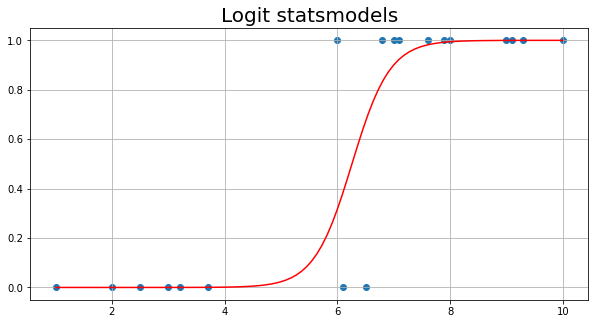

In [289]:
valores_graficar = np.linspace(min(x_vals), max(x_vals), 100)
# graficamos el modelo (cuando se tiene solo un regresor)
def modelo_nolineal(x):
    return 1 / (1 + np.exp(-(betas[0] + betas[1]*x)))
plt.figure(figsize=(10, 5))
plt.scatter(x_vals, y)
plt.plot(valores_graficar, modelo_nolineal(valores_graficar), color='red') 
plt.title('Logit statsmodels', fontsize=20)
plt.grid()

### Sklearn

In [156]:
from sklearn.model_selection import train_test_split

In [239]:
# X_train, X_test, y_train, y_test = train_test_split(df[['x']], y, test_size=0.1)

In [248]:
# X_train, X_test, y_train, y_test

In [249]:
from sklearn.linear_model import LogisticRegression

In [250]:
model = LogisticRegression()

In [278]:
model.fit(df[['x']], y)

LogisticRegression()

In [279]:
model.coef_, model.intercept_

(array([[1.24378307]]), array([-7.32100825]))

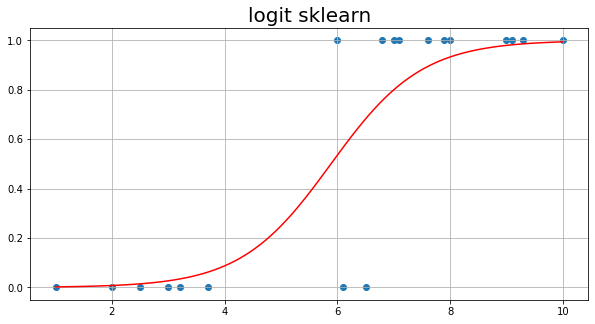

In [290]:
valores_graficar = np.linspace(min(x_vals), max(x_vals), 100)
# graficamos el modelo (cuando se tiene solo un regresor)
def modelo_nolineal(x):
    return 1 / (1 + np.exp(-(model.intercept_[0] + model.coef_[0]*x)))
plt.figure(figsize=(10, 5))
plt.scatter(x_vals, y)
plt.plot(valores_graficar, modelo_nolineal(valores_graficar), color='red') 
plt.title('logit sklearn', fontsize=20)
plt.grid()

Ojo. Esto es sin el train test split

#### sklearn con dimensión mayor de datos

In [325]:
datos = pd.read_csv('Practica4.2.csv')
datos.head()

,X1,X2,X3,X4,Y
0,3,8,5,9,1
1,1,0,1,7,0
2,3,5,5,3,1
3,2,9,4,1,1
4,8,5,7,6,0


In [335]:
x = datos.iloc[:, 0:-1]
Y = datos.iloc[:, -1]

In [336]:
x['n'] = 1
rws = list(x.index)
cols = list(x.columns)
x = x[[cols[-1]] + cols[0:-1]]
X = x.to_numpy()
x.head()

,n,X1,X2,X3,X4
0,1,3,8,5,9
1,1,1,0,1,7
2,1,3,5,5,3
3,1,2,9,4,1
4,1,8,5,7,6


In [292]:
modelo = LogisticRegression()

In [299]:
modelo.fit(X, Y)

LogisticRegression()

In [317]:
params = modelo.coef_[0]
params

array([-0.751964  ,  0.66213346,  0.86345398, -0.47989532])

In [318]:
intercept = modelo.intercept_
intercept

array([-0.70282263])